Using device: cuda

Dataset statistics:
Total images: 21000
Number of classes: 30
Class distribution:
Asian-badger: 700 images
Groundhog-baibak: 700 images
argali: 700 images
badger: 700 images
beaver: 700 images
brown-bear: 700 images
capercaillie: 700 images
crane: 700 images
field-lark: 700 images
fox: 700 images
gold-eagle: 700 images
hare: 700 images
heron: 700 images
hog: 700 images
kedrovka: 700 images
lynx: 700 images
mallard: 700 images
marten: 700 images
mericanmink: 700 images
moose: 700 images
murtiger: 700 images
otter: 700 images
polecat: 700 images
raccoon-dog: 700 images
sub-deer: 700 images
swan: 700 images
ular: 700 images
white-tailed-eagle: 700 images
wolf: 700 images
woodpecker: 700 images

Dataset splits:
Training set: 14700 images
Validation set: 3150 images
Test set: 3150 images


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



First stage training (frozen layers)

Epoch 1/12:
Train Loss: 2.9910, Acc: 0.3139
Val Loss: 2.3942, Acc: 0.7051

Epoch 2/12:
Train Loss: 2.1526, Acc: 0.5982
Val Loss: 1.6333, Acc: 0.7768

Epoch 3/12:
Train Loss: 1.6270, Acc: 0.6832
Val Loss: 1.1990, Acc: 0.8171

Epoch 4/12:
Train Loss: 1.3152, Acc: 0.7296
Val Loss: 0.9688, Acc: 0.8270

Epoch 5/12:
Train Loss: 1.1314, Acc: 0.7520
Val Loss: 0.8295, Acc: 0.8387

Epoch 6/12:
Train Loss: 0.9993, Acc: 0.7722
Val Loss: 0.7221, Acc: 0.8581

Epoch 7/12:
Train Loss: 0.9038, Acc: 0.7843
Val Loss: 0.6537, Acc: 0.8581

Epoch 8/12:
Train Loss: 0.8339, Acc: 0.7975
Val Loss: 0.6079, Acc: 0.8629

Epoch 9/12:
Train Loss: 0.7751, Acc: 0.8082
Val Loss: 0.5532, Acc: 0.8730

Epoch 10/12:
Train Loss: 0.7260, Acc: 0.8165
Val Loss: 0.5176, Acc: 0.8787

Epoch 11/12:
Train Loss: 0.6838, Acc: 0.8268
Val Loss: 0.4903, Acc: 0.8848

Epoch 12/12:
Train Loss: 0.6463, Acc: 0.8361
Val Loss: 0.4642, Acc: 0.8860

Evaluating on validation set after first stage:

Validatio

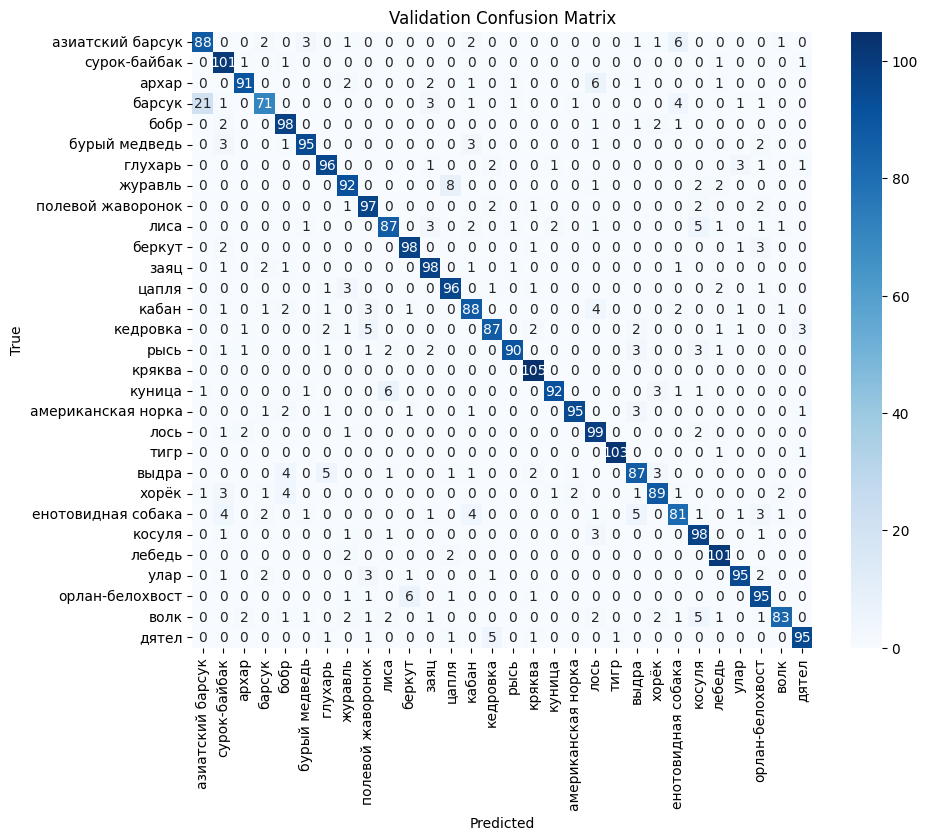


Second stage training (unfrozen layers)

Epoch 1/8:
Train Loss: 0.5052, Acc: 0.8670
Val Loss: 0.3133, Acc: 0.9213

Epoch 2/8:
Train Loss: 0.3610, Acc: 0.9097
Val Loss: 0.2312, Acc: 0.9371

Epoch 3/8:
Train Loss: 0.2822, Acc: 0.9304
Val Loss: 0.1927, Acc: 0.9486

Epoch 4/8:
Train Loss: 0.2368, Acc: 0.9411
Val Loss: 0.1626, Acc: 0.9568

Epoch 5/8:
Train Loss: 0.1878, Acc: 0.9559
Val Loss: 0.1366, Acc: 0.9635

Epoch 6/8:
Train Loss: 0.1576, Acc: 0.9629
Val Loss: 0.1126, Acc: 0.9717

Epoch 7/8:
Train Loss: 0.1341, Acc: 0.9720
Val Loss: 0.0981, Acc: 0.9746

Epoch 8/8:
Train Loss: 0.1193, Acc: 0.9744
Val Loss: 0.0841, Acc: 0.9803

Evaluating on validation set after second stage:

Validation Results:
Loss: 0.0841, Accuracy: 0.9803

Classification Report:
                    precision    recall  f1-score   support

  азиатский барсук       0.95      0.94      0.95       105
      сурок-байбак       1.00      0.98      0.99       105
             архар       1.00      0.97      0.99       105


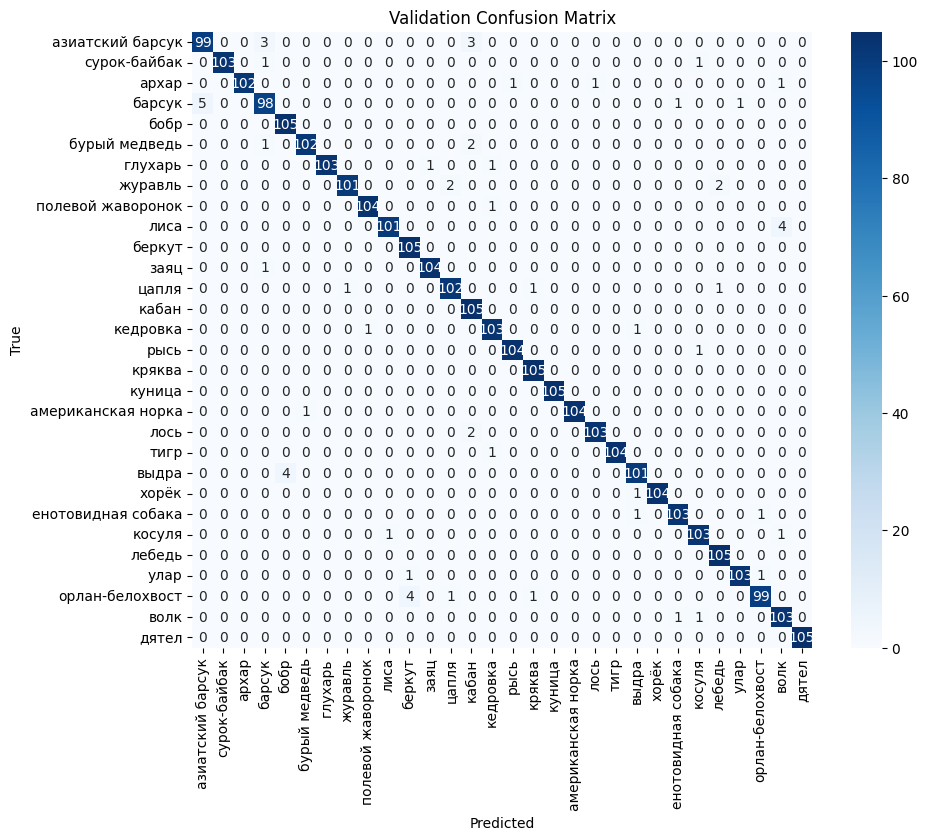


Final evaluation on test set:

Test Results:
Loss: 0.0733, Accuracy: 0.9819

Classification Report:
                    precision    recall  f1-score   support

  азиатский барсук       0.95      0.99      0.97       105
      сурок-байбак       0.99      0.99      0.99       105
             архар       1.00      1.00      1.00       105
            барсук       0.98      0.87      0.92       105
              бобр       0.97      1.00      0.99       105
     бурый медведь       1.00      0.97      0.99       105
           глухарь       1.00      0.99      1.00       105
           журавль       0.98      0.98      0.98       105
 полевой жаворонок       1.00      0.97      0.99       105
              лиса       0.99      0.96      0.98       105
            беркут       0.97      0.97      0.97       105
              заяц       1.00      0.99      1.00       105
             цапля       0.98      0.99      0.99       105
             кабан       0.97      0.99      0.98       10

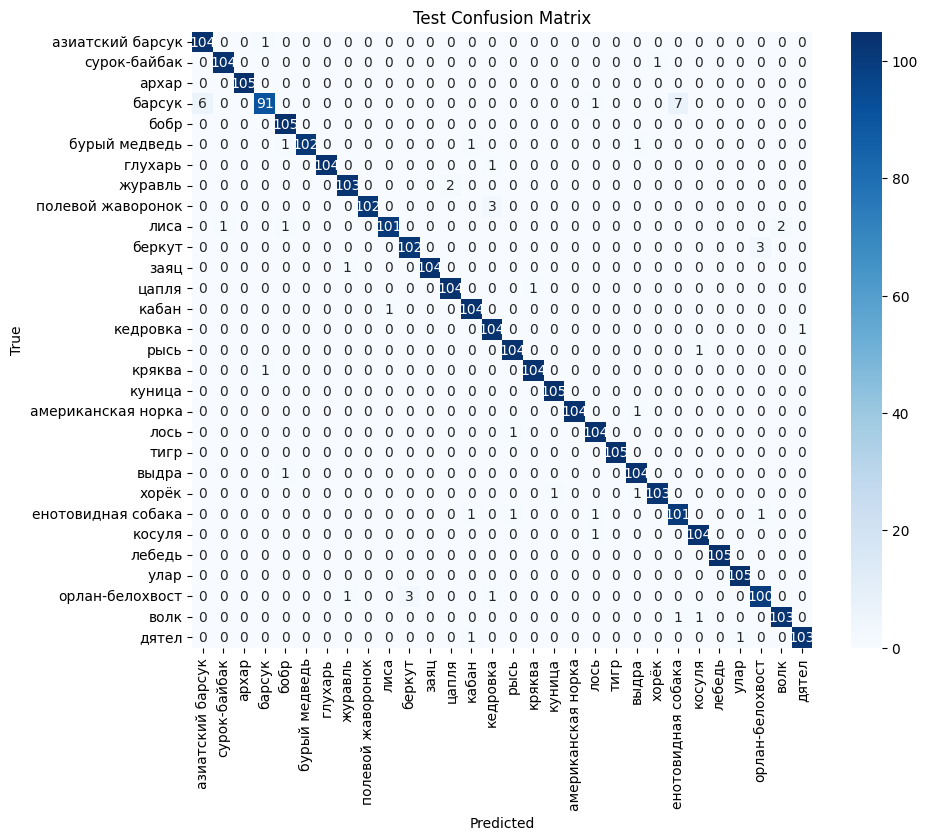

In [2]:
# ------------------------- Блок 1: Импорты -------------------------
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, models, datasets
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Импорт словаря перевода
from animals_30vid import animals_30vid

# Проверка доступности GPU и установка устройства
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# ------------------------- Блок 2: Параметры -------------------------

DATASET_DIR = r'C:/Users/admin/Desktop/work/model_resnet/dataset_30vid/data_balanced'

IMG_SIZE = (224, 224)
BATCH_SIZE = 48
EPOCHS = 12
LR = 3e-5
VAL_SPLIT = 0.15
TEST_SPLIT = 0.15  

# ------------------------- Блок 3: Подготовка данных -------------------------

# Трансформации для данных
train_transform = transforms.Compose([
    transforms.Resize(IMG_SIZE),
    transforms.RandomRotation(15),
    transforms.RandomHorizontalFlip(),
    transforms.RandomResizedCrop(IMG_SIZE, scale=(0.9, 1.0), ratio=(0.9, 1.1)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize(IMG_SIZE),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize(IMG_SIZE),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Загрузка всего датасета
full_dataset = datasets.ImageFolder(DATASET_DIR)

# Вывод информации о количестве изображений
print("\nDataset statistics:")
print(f"Total images: {len(full_dataset)}")
print(f"Number of classes: {len(full_dataset.classes)}")
print("Class distribution:")
for class_name, count in zip(full_dataset.classes, np.bincount(full_dataset.targets)):
    print(f"{class_name}: {count} images")



# Разделение на тренировочную, валидационную и тестовую выборки

from collections import defaultdict
import random
import numpy as np

# 1. Собираем индексы по классам
class_indices = defaultdict(list)
for idx, (_, label) in enumerate(full_dataset.samples):
    class_indices[label].append(idx)

# 2. Перемешиваем внутри каждого класса
for label in class_indices:
    random.shuffle(class_indices[label])

# 3. Разделяем каждый класс на train/val/test
train_idx = []
val_idx = []
test_idx = []

for label, indices in class_indices.items():
    n_total = len(indices)
    n_test = int(TEST_SPLIT * n_total)
    n_val = int(VAL_SPLIT * n_total)
    n_train = n_total - n_test - n_val
    
    # Разделение
    train_idx.extend(indices[:n_train])
    val_idx.extend(indices[n_train:n_train + n_val])
    test_idx.extend(indices[n_train + n_val:])

# 4. Дополнительно перемешиваем выборки (можно не делать)
random.shuffle(train_idx)
random.shuffle(val_idx)
random.shuffle(test_idx)



# Создание подмножеств с разными трансформациями
train_dataset = datasets.ImageFolder(
    DATASET_DIR,
    transform=train_transform
)
train_dataset = Subset(train_dataset, train_idx)

val_dataset = datasets.ImageFolder(
    DATASET_DIR,
    transform=val_transform
)
val_dataset = Subset(val_dataset, val_idx)

test_dataset = datasets.ImageFolder(
    DATASET_DIR,
    transform=test_transform
)
test_dataset = Subset(test_dataset, test_idx)

# Создание DataLoader
train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=4,
    pin_memory=True
)

val_loader = DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=4,
    pin_memory=True
)

test_loader = DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=4,
    pin_memory=True
)

# Получение информации о классах
class_names = full_dataset.classes
num_classes = len(class_names)

# Вывод информации о размерах выборок
print("\nDataset splits:")
print(f"Training set: {len(train_dataset)} images")
print(f"Validation set: {len(val_dataset)} images")
print(f"Test set: {len(test_dataset)} images")

# ------------------------- Блок 4: Модель -------------------------

class ResNet50Model(nn.Module):
    def __init__(self, num_classes):
        super(ResNet50Model, self).__init__()
        self.resnet = models.resnet50(pretrained=True)
        
        # Замораживаем все слои
        for param in self.resnet.parameters():
            param.requires_grad = False
            
        # Заменяем последний слой
        num_ftrs = self.resnet.fc.in_features
        self.resnet.fc = nn.Sequential(
            nn.Linear(num_ftrs, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )
        
    def forward(self, x):
        return self.resnet(x)

model = ResNet50Model(num_classes).to(device)

# Функция потерь и оптимизатор
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR)

# ------------------------- Блок 5: Callbacks и утилиты -------------------------

# Ранняя остановка
class EarlyStopping:
    def __init__(self, patience=7, delta=0.001):
        self.patience = patience
        self.delta = delta
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        
    def __call__(self, val_loss):
        score = -val_loss
        
        if self.best_score is None:
            self.best_score = score
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.counter = 0

early_stopping = EarlyStopping(patience=5)

# Сохранение модели
def save_model(model, path='best_resnet50.pth'):
    torch.save(model.state_dict(), path)

# Планировщик обучения
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=3, factor=0.5)

# Функция для оценки модели
def evaluate_model(model, data_loader, criterion, dataset_name="Validation"):
    model.eval()
    total_loss = 0.0
    correct = 0
    total = 0
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            total_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    avg_loss = total_loss / len(data_loader.dataset)
    accuracy = correct / total
    
    print(f"\n{dataset_name} Results:")
    print(f"Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}")
    
    # Classification Report
    translated_labels = [animals_30vid.get(label, label) for label in class_names]
    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds, target_names=translated_labels))
    
    # Confusion Matrix
    plt.figure(figsize=(10,8))
    sns.heatmap(confusion_matrix(all_labels, all_preds), annot=True, fmt="d", 
                xticklabels=translated_labels, yticklabels=translated_labels, cmap="Blues")
    plt.title(f"{dataset_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    
    return all_preds, all_labels

# ------------------------- Блок 6: Обучение -------------------------

def train_model(model, train_loader, val_loader, epochs, optimizer, criterion):
    best_val_loss = float('inf')
    
    for epoch in range(epochs):
        model.train()
        train_loss = 0.0
        correct_train = 0
        total_train = 0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()
        
        train_loss = train_loss / len(train_loader.dataset)
        train_acc = correct_train / total_train
        
        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                
                val_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs.data, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()
        
        val_loss = val_loss / len(val_loader.dataset)
        val_acc = correct_val / total_val
        
        # Обновление планировщика
        scheduler.step(val_loss)
        
        # Проверка ранней остановки
        early_stopping(val_loss)
        if early_stopping.early_stop:
            print("Early stopping")
            break
            
        # Сохранение лучшей модели
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            save_model(model)
        
        print(f'\nEpoch {epoch+1}/{epochs}:')
        print(f'Train Loss: {train_loss:.4f}, Acc: {train_acc:.4f}')
        print(f'Val Loss: {val_loss:.4f}, Acc: {val_acc:.4f}')
    
    return model

# Первый этап обучения (замороженные слои)
print("\nFirst stage training (frozen layers)")
model = train_model(model, train_loader, val_loader, EPOCHS, optimizer, criterion)

# Оценка на валидационной выборке после первого этапа
print("\nEvaluating on validation set after first stage:")
val_preds, val_labels = evaluate_model(model, val_loader, criterion, "Validation")

# ------------------------- Блок 7: Разморозка и дообучение -------------------------

# Размораживаем все слои
for param in model.resnet.parameters():
    param.requires_grad = True

# Новый оптимизатор с меньшим learning rate
optimizer = optim.Adam(model.parameters(), lr=LR/10)

# Второй этап обучения
print("\nSecond stage training (unfrozen layers)")
model = train_model(model, train_loader, val_loader, 8, optimizer, criterion)

# Оценка на валидационной выборке после второго этапа
print("\nEvaluating on validation set after second stage:")
val_preds, val_labels = evaluate_model(model, val_loader, criterion, "Validation")

# ------------------------- Блок 8: Оценка на тестовой выборке -------------------------

# Загрузка лучшей модели
model.load_state_dict(torch.load('best_resnet50.pth', map_location=device))

# Оценка на тестовой выборке
print("\nFinal evaluation on test set:")
test_preds, test_labels = evaluate_model(model, test_loader, criterion, "Test")

In [3]:
# Архитектура модели и ее создание
class ResNet50Model(nn.Module):
    def __init__(self, num_classes):
        super(ResNet50Model, self).__init__()
        self.resnet = models.resnet50(pretrained=False)
            
        # Заменяем последний слой
        num_ftrs = self.resnet.fc.in_features
        self.resnet.fc = nn.Sequential(
            nn.Linear(num_ftrs, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )
        
    def forward(self, x):
        return self.resnet(x)

num_classes = 30
model = ResNet50Model(num_classes).to(device)

# Доступ к весам
model.load_state_dict(torch.load('best_resnet50.pth', map_location=device))
for name, param in model.named_parameters():
    if 'weight' in name:
        print(f"{name}: {param.shape}")

# Режим предсказаний
model.eval()

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


resnet.conv1.weight: torch.Size([64, 3, 7, 7])
resnet.bn1.weight: torch.Size([64])
resnet.layer1.0.conv1.weight: torch.Size([64, 64, 1, 1])
resnet.layer1.0.bn1.weight: torch.Size([64])
resnet.layer1.0.conv2.weight: torch.Size([64, 64, 3, 3])
resnet.layer1.0.bn2.weight: torch.Size([64])
resnet.layer1.0.conv3.weight: torch.Size([256, 64, 1, 1])
resnet.layer1.0.bn3.weight: torch.Size([256])
resnet.layer1.0.downsample.0.weight: torch.Size([256, 64, 1, 1])
resnet.layer1.0.downsample.1.weight: torch.Size([256])
resnet.layer1.1.conv1.weight: torch.Size([64, 256, 1, 1])
resnet.layer1.1.bn1.weight: torch.Size([64])
resnet.layer1.1.conv2.weight: torch.Size([64, 64, 3, 3])
resnet.layer1.1.bn2.weight: torch.Size([64])
resnet.layer1.1.conv3.weight: torch.Size([256, 64, 1, 1])
resnet.layer1.1.bn3.weight: torch.Size([256])
resnet.layer1.2.conv1.weight: torch.Size([64, 256, 1, 1])
resnet.layer1.2.bn1.weight: torch.Size([64])
resnet.layer1.2.conv2.weight: torch.Size([64, 64, 3, 3])
resnet.layer1.2.bn2.

ResNet50Model(
  (resnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
     